In [1]:
"""
from ctypes import *
#ctypes.cdll.LoadLibrary('')
lib1 = CDLL("../deps/sparse_rrt/deps/trajopt/build/lib/libsco.so")
lib2 = CDLL("../deps/sparse_rrt/deps/trajopt/build/lib/libutils.so")

import sys
import jax
sys.path.append('../deps/sparse_rrt')
sys.path.append('..')

#from ctypes import *
#ctypes.cdll.LoadLibrary('')
#lib1 = CDLL("/home/yinglong/Documents/kinodynamic/sparse_rrt/deps/trajopt/build/lib/libsco.so")
#lib2 = CDLL("/home/yinglong/Documents/kinodynamic/sparse_rrt/deps/trajopt/build/lib/libutils.so")

from sparse_rrt.planners import SST
#from sparse_rrt.systems import standard_cpp_systems
from sparse_rrt import _sst_module
import numpy as np
import time
import pickle
from plan_utility.informed_path import *
from plan_utility.plan_general import *
from plan_utility.data_structure import *
_system = _sst_module.PSOPTPendulum()
bvp_solver = _sst_module.PSOPTBVPWrapper(_system, 2, 1, 0)

low = []
high = []
state_bounds = _system.get_state_bounds()
for i in range(len(state_bounds)):
    low.append(state_bounds[i][0])
    high.append(state_bounds[i][1])


f = open('../data/pendulum/0/path_%d.pkl' % (0), 'rb')
p = pickle._Unpickler(f)
p.encoding = 'latin1'
state = p.load()

f = open('../data/pendulum/0/control_%d.pkl' % (0), 'rb')
p = pickle._Unpickler(f)
p.encoding = 'latin1'
control = p.load()

f = open('../data/pendulum/0/cost_%d.pkl' % (0), 'rb')
p = pickle._Unpickler(f)
p.encoding = 'latin1'
times = p.load()


def dynamics(x, u):
    MIN_ANGLE, MAX_ANGLE = -np.pi, np.pi
    MIN_W, MAX_W = -7., 7

    MIN_TORQUE, MAX_TORQUE = -1., 1.

    LENGTH = 1.
    MASS = 1.
    DAMPING = .05
    gravity_coeff = MASS*9.81*LENGTH*0.5
    integration_coeff = 3. / (MASS*LENGTH*LENGTH)
    res = np.zeros(2)
    res[0] = x[1]
    res[1] = integration_coeff * (u[0] - gravity_coeff*np.cos(x[0]) - DAMPING*x[1])
    #if res[0] < -np.pi:
    #    res[0] += 2*np.pi
    #elif res[0] > np.pi:
    #    res[0] -= 2 * np.pi
    #res = np.clip(res, [MIN_ANGLE, MIN_W], [MAX_ANGLE, MAX_W])
    return res
def jax_dynamics(x, u):
    MIN_ANGLE, MAX_ANGLE = -np.pi, np.pi
    MIN_W, MAX_W = -7., 7

    MIN_TORQUE, MAX_TORQUE = -1., 1.

    LENGTH = 1.
    MASS = 1.
    DAMPING = .05
    gravity_coeff = MASS*9.81*LENGTH*0.5
    integration_coeff = 3. / (MASS*LENGTH*LENGTH)
    #res = jax.numpy.zeros(2)
    #res[0] = x[1]
    #res[1] = integration_coeff * (u[0] - gravity_coeff*jax.numpy.cos(x[0]) - DAMPING*x[1])
    return jax.numpy.asarray([x[1],integration_coeff * (u[0] - gravity_coeff*jax.numpy.cos(x[0]) - DAMPING*x[1])])

def informer(env, x0, xG, direction):
    # here we find the nearest point to x0 in the data, and depending on direction, find the adjacent node
    dif = np.linalg.norm(x0.x - state, axis=1)
    max_d_i = np.argmin(dif)
    if direction == 0:
        # forward
        res = Node(state[max_d_i+1])
    else:
        res = Node(state[max_d_i-1])
    return res

traj_opt = lambda x0, x1: bvp_solver.solve(x0, x1, 500, 20, 100, 0.002)

start = Node(state[0])
goal = Node(state[-1])
goal.S0 = np.identity(2)
goal.rho0 = 1.0
print(jax.jacfwd(jax_dynamics, argnums=0)(np.array(state[0]),np.array([0.])))
jac_A = jax.jacfwd(jax_dynamics, argnums=0)
jac_B = jax.jacfwd(jax_dynamics, argnums=1)
print(jac_A(state[0],np.array([0.])))
#target_reached = plan(None, start, goal, informer, dynamics, traj_opt, jac_A, jac_B, step_sz=0.002, MAX_LENGTH=1000)
"""

'\nfrom ctypes import *\n#ctypes.cdll.LoadLibrary(\'\')\nlib1 = CDLL("../deps/sparse_rrt/deps/trajopt/build/lib/libsco.so")\nlib2 = CDLL("../deps/sparse_rrt/deps/trajopt/build/lib/libutils.so")\n\nimport sys\nimport jax\nsys.path.append(\'../deps/sparse_rrt\')\nsys.path.append(\'..\')\n\n#from ctypes import *\n#ctypes.cdll.LoadLibrary(\'\')\n#lib1 = CDLL("/home/yinglong/Documents/kinodynamic/sparse_rrt/deps/trajopt/build/lib/libsco.so")\n#lib2 = CDLL("/home/yinglong/Documents/kinodynamic/sparse_rrt/deps/trajopt/build/lib/libutils.so")\n\nfrom sparse_rrt.planners import SST\n#from sparse_rrt.systems import standard_cpp_systems\nfrom sparse_rrt import _sst_module\nimport numpy as np\nimport time\nimport pickle\nfrom plan_utility.informed_path import *\nfrom plan_utility.plan_general import *\nfrom plan_utility.data_structure import *\n_system = _sst_module.PSOPTPendulum()\nbvp_solver = _sst_module.PSOPTBVPWrapper(_system, 2, 1, 0)\n\nlow = []\nhigh = []\nstate_bounds = _system.get_state_

In [2]:
#x1 = Node(np.array([0.342311, 4.01922]))
#x0 = Node(np.array([0.893726, 0.0256054]))
#x1 = Node(state[0])
#x0 = Node(state[-1])
#direction = 1
#step_sz = 0.002


# informed_path

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
### plan_general
from ctypes import *
#ctypes.cdll.LoadLibrary('')
lib1 = CDLL("../deps/sparse_rrt/deps/trajopt/build/lib/libsco.so")
lib2 = CDLL("../deps/sparse_rrt/deps/trajopt/build/lib/libutils.so")

import sys
import jax
sys.path.append('../deps/sparse_rrt')
sys.path.append('..')


In [4]:
import sys
sys.path.append('..')
import numpy as np
from tvlqr.python_tvlqr import tvlqr
from tvlqr.python_lyapunov import sample_tv_verify
from plan_utility.data_structure import Node, Edge


def propagate(x, us, dts, dynamics, enforce_bounds, step_sz=None):
    # use the dynamics to interpolate the state x
    # can implement different interpolation method for this
    new_xs = [x]
    new_us = []
    new_dts = []
    for i in range(len(us)):
        dt = dts[i]
        u = us[i]
        num_steps = int(dt / step_sz)
        last_step = dt - num_steps*step_sz
        for k in range(num_steps):
            x = x + step_sz*dynamics(x, u)
            x = enforce_bounds(x)
            new_xs.append(x)
            new_us.append(u)
            new_dts.append(step_sz)
        x = x + last_step*dynamics(x, u)
        x = enforce_bounds(x)
        new_xs.append(x)
        new_us.append(u)
        new_dts.append(last_step)
    new_xs = np.array(new_xs)
    new_us = np.array(new_us)
    new_dts = np.array(new_dts)
    return new_xs, new_us, new_dts
def traj_opt(x0, x1, solver):
    # use trajectory optimization method to compute trajectory between x0 and x1
    # load the dynamics function corresponding to the envname
    xs, us, ts = solver.solve(x0, x1)
    return xs, us, ts


def pathSteerTo(x0, x1, dynamics, enforce_bounds, jac_A, jac_B, traj_opt, direction, step_sz=0.002, compute_funnel=True):
    # direciton 0 means forward from x0 to x1
    # direciton 1 means backward from x0 to x1
    # jac_A: given x, u -> linearization A
    # jac_B: given x, u -> linearization B
    # traj_opt: a function given two endpoints x0, x1, compute the optimal trajectory
    if direction == 0:
        xs, us, dts = traj_opt(x0.x, x1.x)
        """
        print('----------------forward----------------')
        print('trajectory opt:')
        print('start:')
        print(x0.x)
        print('end:')
        print(x1.x)
        print('xs[0]:')
        print(xs[0])
        print('xs[-1]:')
        print(xs[-1])
        print('xs:')
        print(xs)
        print('us:')
        print(us)
        print('dts:')
        print(dts)
        """
        # ensure us and dts have length 1 less than xs
        if len(us) == len(xs):
            us = us[:-1]
        xs, us, dts = propagate(x0.x, us, dts, dynamics=dynamics, enforce_bounds=enforce_bounds, step_sz=step_sz)
        """
        print('propagation result:')
        print('xs[0]:')
        print(xs[0])
        print('xs[-1]:')
        print(xs[-1])
        print('us:')
        print(us)
        print('dts:')
        print(dts)
        """
        edge_dt = np.sum(dts)
        start = x0
        goal = Node(xs[-1])
        x1 = goal
    else:
        xs, us, dts = traj_opt(x1.x, x0.x)
        """
        print('----------------backward----------------')
        print('trajectory opt:')
        print('start:')
        print(x1.x)
        print('end:')
        print(x0.x)
        print('xs[0]:')
        print(xs[0])
        print('xs[-1]:')
        print(xs[-1])
        print('xs:')
        print(xs)
        print('us:')
        print(us)
        print('dts:')
        print(dts)
        """
        if len(us) == len(xs):
            us = us[:-1]
        us = np.flip(us, axis=0)
        dts = np.flip(dts, axis=0)
        # reversely propagate the system
        xs, us, dts = propagate(x0.x, us, dts, dynamics=lambda x, u: -dynamics(x, u), enforce_bounds=enforce_bounds, step_sz=step_sz)
        xs = np.flip(xs, axis=0)
        us = np.flip(us, axis=0)
        dts = np.flip(dts, axis=0)
        """
        print('propagation result:')
        print('xs[0]:')
        print(xs[0])
        print('xs[-1]:')
        print(xs[-1])
        print('us:')
        print(us)
        print('dts:')
        print(dts)
        """
        edge_dt = np.sum(dts)
        start = Node(xs[0])  # after flipping, the first in xs is the start
        goal = x0
        x1 = start

    # notice that controller time starts from 0, hence locally need to shift the time by minusing t0_edges
    # start from 0
    time_knot = np.cumsum(dts)
    time_knot = np.insert(time_knot, 0, 0.)

    # can also change the resolution by the following function (for instance, every 10)
    #indices = np.arange(0, len(time_knot), 10)
    #time_knot = time_knot[indices]
    #print(time_knot)

    edge = Edge(xs, us, dts, time_knot, edge_dt)
    edge.next = goal
    start.edge = edge
    start.next = goal
    goal.prev = start

    if goal.S0 is None or not compute_funnel:
        return x1, edge
    # the values to return: new node, new edge
    res_x = x1
    res_edge = edge    
    # if the upper is defined, then we can backpropagate the tvlqr and funnel computation    
    while start is not None:
        # assuming we haven't computed tvlqr for start->goal
        edge = start.edge
        xs = edge.xs
        us = edge.us
        dts = edge.dts
        Qf = goal.S0
        if Qf is not None:
            Qf = np.array(Qf)
        controller, xtraj, utraj, S = tvlqr(xs, us, dts, dynamics, jac_A, jac_B, Qf=Qf)
        start.S0 = S(0).reshape((len(start.x),len(start.x)))
        edge.xtraj = xtraj
        edge.utraj = utraj
        edge.S = S
        edge.controller = controller

        # otherwise, recursively backpropagate the funnel computation
        #print("xs (which is used to construct xtraj):")
        #print(xs)
        #print('xtraj.x:')
        #print(xtraj.x)        
        upper_x = goal.x
        upper_S = goal.S0
        upper_rho = goal.rho0  # the rho0 of goal will be come the upper_rho currently
        time_knot = start.edge.time_knot
        xtraj = start.edge.xtraj
        utraj = start.edge.utraj
        #print('time_knot:')
        #print(time_knot)
        #print('goal.x:')
        #print(goal.x)
        #print('xtraj(last_time):')
        #print(xtraj(time_knot[-1]))
        S = start.edge.S
        print('time_knot: %d' % (len(time_knot)))
        #todo: to add rho0s and rho1s list to edge
        # reversely construct the funnel
        for i in range(len(time_knot)-1, 0, -1):
            t0 = time_knot[i-1]
            t1 = time_knot[i]
            x0 = xtraj(t0)
            u0 = utraj(t0)
            x1 = xtraj(t1)
            #if i == len(time_knot)-1:
            #    x1 = goal.x
            u1 = utraj(t1)
            A0 = jac_A(x0, u0)
            B0 = jac_B(x0, u0)
            A1 = jac_A(x1, u1)
            B1 = jac_B(x1, u1)
            A0 = np.asarray(A0)
            B0 = np.asarray(B0)
            A1 = np.asarray(A1)
            B1 = np.asarray(B1)
            S0 = S(t0).reshape(len(x0),len(x0))
            S1 = S(t1).reshape(len(x0),len(x0))
            Q = np.identity(len(x0))
            R = np.identity(len(u0))
            ##TODO: check the output of sample_tv_verify
            #print('verifying...')
            #print('x0:')
            #print(x0)
            #print('x1:')
            #print(x1)
            #print('upper_x')
            #print(upper_x)
            #print("S1:")
            #print(S1)
            #print("upper_S:")
            #print(upper_S)
            rho0, rho1 = sample_tv_verify(t0, t1, upper_x, upper_S, upper_rho, S0, S1, A0, A1, B0, B1, R, Q, x0, x1, u0, u1, func=dynamics, numSample=1000)
            if i == len(time_knot)-1 or i==1:
                print('upper_rho=%f, rho0=%f, rho1=%f' % (upper_rho, rho0, rho1))
            upper_rho = rho0
            upper_x = x0
            upper_S = S0
            #tvlqr_rhos.append([rho0, rho1, t0, t1])
            if i == len(time_knot)-1:
                # the endpoint
                start.edge.rho1 = rho1
                goal.rho1 = rho1
                goal.S1 = S1
        start.edge.rho0 = rho0
        start.rho0 = rho0
        start = start.prev
        goal = goal.prev
    return res_x, res_edge

def funnelSteerTo(x0, x1, dynamics, enforce_bounds, jac_A, jac_B, traj_opt, direciton, step_sz=0.02):
    start = x0
    goal = x1
    # recursively backpropagate the funnel computation
    while start is not None:
        # assuming we haven't computed tvlqr for start->goal
        edge = start.edge
        xs = edge.xs
        us = edge.us
        dts = edge.dts
        Qf = goal.S0
        if Qf is not None:
            Qf = np.array(Qf)
        controller, xtraj, utraj, S = tvlqr(xs, us, dts, dynamics, jac_A, jac_B, Qf=Qf)
        start.S0 = S(0).reshape((len(start.x),len(start.x)))
        edge.xtraj = xtraj
        edge.utraj = utraj
        edge.S = S
        edge.controller = controller

        # otherwise, recursively backpropagate the funnel computation
        #print("xs (which is used to construct xtraj):")
        #print(xs)
        #print('xtraj.x:')
        #print(xtraj.x)        
        upper_x = goal.x
        upper_S = goal.S0
        upper_rho = goal.rho0  # the rho0 of goal will be come the upper_rho currently
        time_knot = start.edge.time_knot
        xtraj = start.edge.xtraj
        utraj = start.edge.utraj
        #print('time_knot:')
        #print(time_knot)
        #print('goal.x:')
        #print(goal.x)
        #print('xtraj(last_time):')
        #print(xtraj(time_knot[-1]))
        S = start.edge.S
        print('time_knot: %d' % (len(time_knot)))
        #todo: to add rho0s and rho1s list to edge
        # reversely construct the funnel
        for i in range(len(time_knot)-1, 0, -1):
            t0 = time_knot[i-1]
            t1 = time_knot[i]
            x0 = xtraj(t0)
            u0 = utraj(t0)
            x1 = xtraj(t1)
            #if i == len(time_knot)-1:
            #    x1 = goal.x
            u1 = utraj(t1)
            A0 = jac_A(x0, u0)
            B0 = jac_B(x0, u0)
            A1 = jac_A(x1, u1)
            B1 = jac_B(x1, u1)
            A0 = np.asarray(A0)
            B0 = np.asarray(B0)
            A1 = np.asarray(A1)
            B1 = np.asarray(B1)
            S0 = S(t0).reshape(len(x0),len(x0))
            S1 = S(t1).reshape(len(x0),len(x0))
            Q = np.identity(len(x0))
            R = np.identity(len(u0))
            ##TODO: check the output of sample_tv_verify
            """
            print('verifying...')
            print('x0:')
            print(x0)
            print('x1:')
            print(x1)
            print('upper_x')
            print(upper_x)
            print("S1:")
            print(S1)
            print("upper_S:")
            print(upper_S)
            """
            rho0, rho1 = sample_tv_verify(t0, t1, upper_x, upper_S, upper_rho, S0, S1, A0, A1, B0, B1, R, Q, x0, x1, u0, u1, func=dynamics, numSample=1000)
            if i == len(time_knot)-1 or i==1:
                print('upper_rho=%f, rho0=%f, rho1=%f' % (upper_rho, rho0, rho1))
            upper_rho = rho0
            upper_x = x0
            upper_S = S0
            #tvlqr_rhos.append([rho0, rho1, t0, t1])
            if i == len(time_knot)-1:
                # the endpoint
                start.edge.rho1 = rho1
                goal.rho1 = rho1
                goal.S1 = S1
        start.edge.rho0 = rho0
        start.rho0 = rho0
        start = start.prev
        goal = goal.prev

def nearby(x0, x1):
    # using the S and rho stored by the node to determine distance
    # if x0 lies in x1, and within the boundary of x1 (S, rho0)
    # notice that for circulating state, needs to map the angle
    S = x1.S0
    print('nearby:')
    #print("x0:")
    #print(x0.x)
    #print("x1:")
    #print(x1.x)
    #print(S)
    print(x1.rho0)
    delta_x = x0.x - x1.x
    # this is pendulum specific. For other envs, need to do similar things
    if delta_x[0] > np.pi:
        delta_x[0] = delta_x[0] - 2*np.pi
    if delta_x[0] < -np.pi:
        delta_x[0] = delta_x[0] + 2*np.pi
    xTSx = delta_x.T@S@delta_x
    print('xTSx: %f' % (xTSx))
    if xTSx <= x1.rho0*x1.rho0:
        return True
    else:
        return False

In [5]:
import sys
sys.path.append('..')

import numpy as np
#from plan_utility.plan_general import *
# this one predicts one individual path using informer and trajopt
def plan(env, x0, xG, informer, dynamics, enforce_bounds, traj_opt, jac_A, jac_B, step_sz=0.02, MAX_LENGTH=1000):
    # informer: given (xt, x_desired) ->  x_t+1
    # jac_A: given (x, u) -> linearization A
    # jac B: given (x, u) -> linearization B
    # traj_opt: given (x0, x1) -> (xs, us, dts)
    itr=0
    target_reached=0
    tree=0
    time_norm = 0.
    while target_reached==0 and itr<MAX_LENGTH:
        itr=itr+1  # prevent the path from being too long
        print('iter: %d' % (itr))
        if tree==0:
            # since we ensure each step we can steer to the next waypoint
            # the edge connecting the two nodes will store the trajectory
            # information, TVLQR and the funnel size factors
            # the edge information is stored at the endpoint
            # here direciton=0 means we are computing forward steer, and 1 means
            # we are computing backward
            x, e = pathSteerTo(x0, informer(env, x0, xG, direction=0), dynamics=dynamics, enforce_bounds=enforce_bounds, traj_opt=traj_opt, jac_A=jac_A, jac_B=jac_B, step_sz=step_sz, direction=0, compute_funnel=True)
            x0.next = x
            x.prev = x0
            e.next = x
            x0.edge = e
            x0 = x
            tree=1
            print('after forward steering:')
            print('state:')
            print(x.x)
            node = xG
            while node is not None:
                target_reached = nearby(x0, node)
                if target_reached:
                    xG = node
                    break
                node = node.next

        else:
            x, e = pathSteerTo(xG, informer(env, xG, x0, direction=1), dynamics=dynamics, enforce_bounds=enforce_bounds, traj_opt=traj_opt, jac_A=jac_A, jac_B=jac_B, step_sz=step_sz, direction=1, compute_funnel=True)
            x.next = xG
            xG.prev = x
            e.next = xG
            x.edge = e
            xG = x
            tree=0
            print('after backward steering:')
            print('state:')
            print(x.x)
            node = x0
            while node is not None:
                target_reached = nearby(node, xG)
                if target_reached:
                    x0 = node
                    break
                node = node.prev


        #xG_, e_ = pathSteerTo(x0, xG, dynamics=dynamics, enforce_bounds=enforce_bounds, traj_opt=traj_opt, jac_A=jac_A, jac_B=jac_B, step_sz=step_sz, direction=0, compute_funnel=False)
        # check if x0 can connect to one node in the backward tree directly, if so, no need to construct a controller from x0 to the node
        # version one: only check endpoint
        #target_reached = nearby(x0, xG)  # check the funnel if can connect
        # version two: new node in start tree: check all goal tree, and otherwise conversely
    if target_reached:
        # it is near enough, so we connect in the node data structure from x0 to xG, although the endpoint of x0.edge
        # in state is still xG_
        x0 = x0.prev  # since the x0 can directly connect to xG, we only need to set the next state of the previous x to xG
        x0.next = xG  # update endpoint (or should I?)
        x0.edge.next = xG
        xG.prev = x0
        # connect the lsat node
        # construct the funnel later
        # connect from x0 to xG, the endpoint of x0 is xG_, but it is near xG
        funnelSteerTo(x0, xG, dynamics, enforce_bounds, jac_A, jac_B, traj_opt, direciton=0, step_sz=step_sz)
        #xG_.next = xG
        #e_.next = xG
        #xG_.edge = e_
    else:
        x0.next = None
        x0.edge = None
    return target_reached



In [6]:
from ctypes import *
#ctypes.cdll.LoadLibrary('')
lib1 = CDLL("../deps/sparse_rrt/deps/trajopt/build/lib/libsco.so")
lib2 = CDLL("../deps/sparse_rrt/deps/trajopt/build/lib/libutils.so")

import sys
import jax
sys.path.append('../deps/sparse_rrt')
sys.path.append('..')

#from ctypes import *
#ctypes.cdll.LoadLibrary('')
#lib1 = CDLL("/home/yinglong/Documents/kinodynamic/sparse_rrt/deps/trajopt/build/lib/libsco.so")
#lib2 = CDLL("/home/yinglong/Documents/kinodynamic/sparse_rrt/deps/trajopt/build/lib/libutils.so")

from sparse_rrt.planners import SST
#from sparse_rrt.systems import standard_cpp_systems
from sparse_rrt import _sst_module
import numpy as np
import time
import pickle
#from plan_utility.informed_path import *
from plan_utility.data_structure import *
from tvlqr.python_lyapunov import sample_ti_verify
import scipy
_system = _sst_module.PSOPTPendulum()
bvp_solver = _sst_module.PSOPTBVPWrapper(_system, 2, 1, 0)

low = []
high = []
state_bounds = _system.get_state_bounds()
for i in range(len(state_bounds)):
    low.append(state_bounds[i][0])
    high.append(state_bounds[i][1])


env_idx = 6
f = open('../data/pendulum/0/path_%d.pkl' % (env_idx), 'rb')
p = pickle._Unpickler(f)
p.encoding = 'latin1'
state = p.load()

f = open('../data/pendulum/0/control_%d.pkl' % (env_idx), 'rb')
p = pickle._Unpickler(f)
p.encoding = 'latin1'
control = p.load()

f = open('../data/pendulum/0/cost_%d.pkl' % (env_idx), 'rb')
p = pickle._Unpickler(f)
p.encoding = 'latin1'
times = p.load()
f = open('../data/pendulum/0/start_goal_%d.pkl' % (env_idx), 'rb')
p = pickle._Unpickler(f)
p.encoding = 'latin1'
sg = p.load()
goal = sg[-1]

def dynamics(x, u):
    MIN_ANGLE, MAX_ANGLE = -np.pi, np.pi
    MIN_W, MAX_W = -7., 7

    MIN_TORQUE, MAX_TORQUE = -1., 1.

    LENGTH = 1.
    MASS = 1.
    DAMPING = .05
    gravity_coeff = MASS*9.81*LENGTH*0.5
    integration_coeff = 3. / (MASS*LENGTH*LENGTH)
    res = np.zeros(2)
    res[0] = x[1]
    res[1] = integration_coeff * (u[0] - gravity_coeff*np.cos(x[0]) - DAMPING*x[1])
    #if res[0] < -np.pi:
    #    res[0] += 2*np.pi
    #elif res[0] > np.pi:
    #    res[0] -= 2 * np.pi
    #res = np.clip(res, [MIN_ANGLE, MIN_W], [MAX_ANGLE, MAX_W])
    return res

def enforce_bounds(state):
    MIN_ANGLE, MAX_ANGLE = -np.pi, np.pi
    MIN_W, MAX_W = -7., 7

    if state[0] < -np.pi:
        state[0] += 2*np.pi
    elif state[0] > np.pi:
        state[0] -= 2 * np.pi
    state = np.clip(state, [MIN_ANGLE, MIN_W], [MAX_ANGLE, MAX_W])
    return state

def stable_u(x):
    MIN_ANGLE, MAX_ANGLE = -np.pi, np.pi
    MIN_W, MAX_W = -7., 7

    MIN_TORQUE, MAX_TORQUE = -1., 1.

    LENGTH = 1.
    MASS = 1.
    DAMPING = .05
    gravity_coeff = MASS*9.81*LENGTH*0.5
    integration_coeff = 3. / (MASS*LENGTH*LENGTH)
    return np.array([gravity_coeff*np.cos(x[0])])

def jax_dynamics(x, u):
    MIN_ANGLE, MAX_ANGLE = -np.pi, np.pi
    MIN_W, MAX_W = -7., 7

    MIN_TORQUE, MAX_TORQUE = -1., 1.

    LENGTH = 1.
    MASS = 1.
    DAMPING = .05
    gravity_coeff = MASS*9.81*LENGTH*0.5
    integration_coeff = 3. / (MASS*LENGTH*LENGTH)
    #res = jax.numpy.zeros(2)
    #res[0] = x[1]
    #res[1] = integration_coeff * (u[0] - gravity_coeff*jax.numpy.cos(x[0]) - DAMPING*x[1])
    return jax.numpy.asarray([x[1],integration_coeff * (u[0] - gravity_coeff*jax.numpy.cos(x[0]) - DAMPING*x[1])])

def lqr(A,B,Q,R):
    """Solve the continuous time lqr controller.

    dx/dt = A x + B u

    cost = integral x.T*Q*x + u.T*R*u
    """
    #ref Bertsekas, p.151

    #first, try to solve the ricatti equation
    X = np.matrix(scipy.linalg.solve_continuous_are(A, B, Q, R))

    #compute the LQR gain
    K = np.matrix(scipy.linalg.inv(R)*(B.T*X))

    eigVals, eigVecs = scipy.linalg.eig(A-B*K)

    return K, X, eigVals

def informer(env, x0, xG, direction):
    # here we find the nearest point to x0 in the data, and depending on direction, find the adjacent node
    dis = np.abs(x0.x - state)
    dis[:,0] = (dis[:,0] > np.pi) * (2*np.pi - dis[:,0]) + (dis[:,0] <= np.pi) * dis[:,0]
    
    dif = np.linalg.norm(dis, axis=1)
    max_d_i = np.argmin(dif)
    print('current state: ')
    print(x0.x)
    print('chosen data:')
    print(state[max_d_i])

    if direction == 0:
        # forward
        if max_d_i+1 == len(state):
            next_idx = max_d_i
        else:
            next_idx = max_d_i+1
        res = Node(state[next_idx])

    else:
        if max_d_i-1 == -1:
            next_idx = max_d_i
        else:
            next_idx = max_d_i-1
        res = Node(state[next_idx])

    """
    # check all node, and find the one with smallest xTSx
    min_V = 1.
    min_V_i = None

    if direction == 0:
        node = xG
        while node is not None:
            x1 = node
            S = x1.S0
            delta_x = x0.x - x1.x
            # this is pendulum specific. For other envs, need to do similar things
            if delta_x[0] > np.pi:
                delta_x[0] = delta_x[0] - 2*np.pi
            if delta_x[0] < -np.pi:
                delta_x[0] = delta_x[0] + 2*np.pi
            xTSx = delta_x.T@S@delta_x    
            if xTSx < min_V:
                min_V = xTSx
                min_V_i = node.x
            node = node.next
    else:
        i# xG<---x0
        node = xG
        while node is not None:
            S = x0.S0
            delta_x = node.x - x0.x
            # this is pendulum specific. For other envs, need to do similar things
            if delta_x[0] > np.pi:
                delta_x[0] = delta_x[0] - 2*np.pi
            if delta_x[0] < -np.pi:
                delta_x[0] = delta_x[0] + 2*np.pi
            xTSx = delta_x.T@S@delta_x    
            if xTSx < min_V:
                min_V = xTSx
                min_V_i = node.x
            node = node.prev
    if min_V_i is not None:
        res = Node(min_V_i)
        print('min_V:')
        print(min_V)
    """
    print('next state:')
    print(res.x)
    return res

traj_opt = lambda x0, x1: bvp_solver.solve(x0, x1, 500, 20, 1, 20, 0.002)
#print(state)
#state = np.append(state, [sg[-1]], axis=0)
#print(state)
state[-1] = sg[-1]
start = Node(state[0])
goal = Node(state[-1])

xG = np.array(sg[-1])
uG = stable_u(sg[-1])
#print(dynamics(xG, uG))
A = jax.jacfwd(jax_dynamics, argnums=0)(xG, uG)
B = jax.jacfwd(jax_dynamics, argnums=1)(xG, uG)

A = np.asarray(A)
B = np.asarray(B)
Q = np.identity(2)
R = np.identity(1)
K, lqr_S, E = lqr(A, B, Q, R)
goal.S0 = np.identity(2)
goal.rho0 = 1.0
lqr_rho = sample_ti_verify(xG, uG, lqr_S, K, dynamics, numSample=1000)
goal.rho0 = lqr_rho
goal.S0 = lqr_S
#print(goal.rho0)

jac_A = jax.jacfwd(jax_dynamics, argnums=0)
jac_B = jax.jacfwd(jax_dynamics, argnums=1)
print('number of state:')
print(len(state))
print('state:')
print(state)
print('dt:')
print(times)
target_reached = plan(None, start, goal, informer, dynamics, enforce_bounds, traj_opt, jac_A, jac_B, step_sz=0.002, MAX_LENGTH=len(state)*2)


/home/arclabdl1/anaconda3/envs/ylmiao_kino/lib/python3.6/site-packages/jax/lib/xla_bridge.py:120: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


number of state:
6
state:
[[-1.26608352 -3.35403717]
 [-1.48457174 -3.67123554]
 [-2.67520461 -1.85398227]
 [-2.43272582  3.16091711]
 [-1.17532524  4.7311707 ]
 [-0.30333765  0.        ]]
dt:
[0.062 0.37  0.342 0.288 0.336]
iter: 1
current state: 
[-1.26608352 -3.35403717]
chosen data:
[-1.26608352 -3.35403717]
next state:
[-1.48457174 -3.67123554]
after forward steering:
state:
[-1.48427939 -3.67351227]
nearby:
0.7179517789085855
xTSx: 8.229852
iter: 2
current state: 
[-0.30333765  0.        ]
chosen data:
[-0.30333765  0.        ]
next state:
[-1.17532524  4.7311707 ]
time_knot: 201
upper_rho=0.717952, rho0=0.682054, rho1=0.717952
upper_rho=0.682054, rho0=0.682054, rho1=0.682054
after backward steering:
state:
[-1.18913837  4.81513064]
nearby:
0.6820541699631546
xTSx: 21.512943
nearby:
0.6820541699631546
xTSx: 20.372532
iter: 3
current state: 
[-1.48427939 -3.67351227]
chosen data:
[-1.48457174 -3.67123554]
next state:
[-2.67520461 -1.85398227]
after forward steering:
state:
[-2.676

In [7]:
import scipy
def plot_ellipsoid(S, rho, x0, color='black', alpha=1.0):
    theta = np.linspace(0, np.pi*2, 100)
    U = [np.cos(theta), np.sin(theta)]
    U = np.array(U).T
    tmp = np.linalg.pinv(S)
    tmp = scipy.linalg.sqrtm(tmp.T @ tmp)
    S_invsqrt = scipy.linalg.sqrtm(tmp)
    X = U @ S_invsqrt  # 100x2
    X = rho*X + x0
    plt.plot(X[:,0],X[:,1], color, alpha=alpha)


In [8]:
print(xG)

[-0.30333765  0.        ]


forward:
actual_x:
[-1.26608352 -3.35403717]
node:
[-1.26608352 -3.35403717]
controller state[0]:
[-1.26608352 -3.35403717]
controller state[-1]:
[-1.48427939 -3.67351227]
norminal_traj[0]:
[-1.26608352 -3.35403717]
norminal_traj[-1]:
[-1.48427939 -3.67351227]
rho0:
0.6479514054249922
actual_x arrived at:
[-1.48427939 -3.67351227]
node arrived at:
[-1.48427939 -3.67351227]
rho1:
0.6479514094249925
forward:
actual_x:
[-1.48427939 -3.67351227]
node:
[-1.48427939 -3.67351227]
controller state[0]:
[-1.48427939 -3.67351227]
controller state[-1]:
[-2.67690919 -1.85900358]
norminal_traj[0]:
[-1.48427939 -3.67351227]
norminal_traj[-1]:
[-2.67690919 -1.85900358]
rho0:
0.6479514095249925
actual_x arrived at:
[-2.67690919 -1.85900358]
node arrived at:
[-2.67690919 -1.85900358]
rho1:
0.6479514289249941
forward:
actual_x:
[-2.67690919 -1.85900358]
node:
[-2.67690919 -1.85900358]
controller state[0]:
[-2.67690919 -1.85900358]
controller state[-1]:
[-2.43235731  3.15899805]
norminal_traj[0]:
[-2.6769

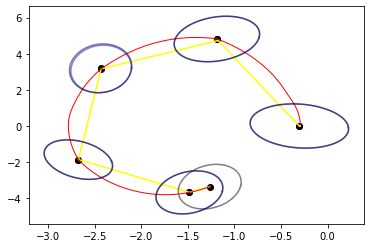

num of nodes: 5


In [9]:

# plot data
plt.plot(state[:,0], state[:,1], 'yellow', label='data')


# using the node to show the path

num_nodes = 0
node = start
actual_x = np.array(node.x)
while node.edge is not None:
    num_nodes += 1
    print('forward:')
    print('actual_x:')
    print(actual_x)
    print('node:')
    print(node.x)
    edge = node.edge
    controller = edge.controller
    time_knot = edge.time_knot
    # use the controller for another trajectory
    #actual_x = np.array(node.x)
    xs = []
    xs.append(actual_x)
    #real_xs = []
    # plot data
    for i in range(len(time_knot)-1):
        u = controller(time_knot[i], actual_x)
        xdot = dynamics(actual_x, u)
        delta_t = time_knot[i+1] - time_knot[i]
        actual_x = actual_x + xdot * delta_t
        xs.append(actual_x)
        #real_xs.append(xtraj(time_span[i]))
        actual_x = enforce_bounds(actual_x)
    xs = np.array(xs)
    #print(xs)
    #print(real_xs)
    plt.plot(xs[:,0], xs[:,1], 'red', label='forward', linewidth=1)
    #plt.plot(real_xs[:,0], real_xs[:,1], 'g', label='cubic interpolation')
    
    print('controller state[0]:')
    print(xs[0])
    print('controller state[-1]:')
    print(xs[-1])
    
    xs = node.edge.xs  # norminal trajectory
    print('norminal_traj[0]:')
    print(xs[0])
    print('norminal_traj[-1]:')
    print(xs[-1])
    # plot funnel  # todo: why S0 is not None, but rho0 is None
    S0 = node.S0  # the current edge's start funnel
    if node.rho0 is not None:
        rho0 = node.rho0
        print('rho0:')
        print(rho0)
        plt.scatter(node.x[0], node.x[1], c='black')
        plot_ellipsoid(S0, rho0, node.x, color='black', alpha=0.5)
    node = edge.next
    print('actual_x arrived at:')
    print(actual_x)
    print('node arrived at:')
    print(node.x)
    S1 = node.S1  # the current edge's end funnel
    if node.rho1 is not None:
        rho1 = node.rho1
        print('rho1:')
        print(rho1)
        plt.scatter(xs[-1,0], xs[-1,1], c='blue')
        plot_ellipsoid(S1, rho1, xs[-1], color='blue', alpha=0.5)
    
# plot funnel for the last node
S0 = node.S0
if node.rho0 is not None:
    rho0 = node.rho0
    print('rho0:')
    print(rho0)
    plt.scatter(node.x[0],node.x[1], c='black')
    plot_ellipsoid(S0, rho0, node.x, color='black', alpha=0.5)
    
# if lqr is defined, use it to stabilize to goal
step_sz = 0.002
xs = []
print('stable point:')
print(node.x)
for time_step in range(1000):
    lqr_u = -K @ (actual_x - node.x) + uG
    xdot = dynamics(actual_x, lqr_u)
    delta_t = step_sz
    actual_x = actual_x + xdot * delta_t
    xs.append(actual_x)
    #real_xs.append(xtraj(time_span[i]))
    actual_x = enforce_bounds(actual_x)
xs = np.array(xs)
print(actual_x)
plt.plot(xs[:,0], xs[:,1], 'pink')
"""
node = goal
while node.prev is not None:
    n_p = node.prev
    edge = n_p.edge
    controller = edge.controller
    time_knot = edge.time_knot
    

    # use the controller for another trajectory
    actual_x = np.array(n_p.x)
    xs = []
    xs.append(actual_x)
    #real_xs = []
    # plot data
    for i in range(len(time_knot)-1):
        u = controller(time_knot[i], actual_x)
        #print('current state:')
        #print(x)
        #print('tracked traj:')
        #print(x_traj(time_span[i]))
        xdot = dynamics(actual_x, u)
        delta_t = time_knot[i+1] - time_knot[i]
        actual_x = actual_x + xdot * delta_t
        xs.append(actual_x)
        #real_xs.append(xtraj(time_span[i]))
        actual_x = enforce_bounds(actual_x)
    xs = np.array(xs)
    #print(xs)
    #print(real_xs)
    plt.plot(xs[:,0], xs[:,1], 'blue', label='backward', linewidth=1)
    #plt.plot(real_xs[:,0], real_xs[:,1], 'g', label='cubic interpolation')
    # plot funnel
    S1 = node.S1
    if S1 is not None:
        rho1 = node.rho1
        print('rho1: %f' % (rho1))
        plot_ellipsoid(S1, rho1, x0=xs[-1], color='black', alpha=0.5)
    node = n_p
"""
        
#plt.legend()
plt.show()

print('num of nodes: %d' % (num_nodes))

In [10]:
print(state)

[[-1.26608352 -3.35403717]
 [-1.48457174 -3.67123554]
 [-2.67520461 -1.85398227]
 [-2.43272582  3.16091711]
 [-1.17532524  4.7311707 ]
 [-0.30333765  0.        ]]


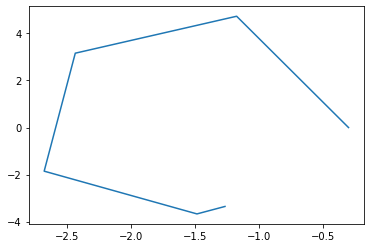

In [11]:
plt.plot(state[:,0], state[:,1])

In [12]:
node = goal
while node.prev is not None:
    print('rho0:')
    print(node.rho0)
    print('rho1:')
    print(node.rho1)
    print('rho0s:')
    print(node.rho0s)
    print('rho1s:')
    print(node.rho1s)
    node = node.prev


rho0:
0.7179517789085855
rho1:
0.7179517788085855
rho0s:


AttributeError: 'Node' object has no attribute 'rho0s'